In [1]:
# --- Import Libraries ---
import pandas as pd
from datetime import datetime

In [2]:
# --- Mount Drive ---
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# --- Load Data ---

# Reading in chunks to avoid session crashes
chunk_size = 100000  # Adjust based on available memory

events_chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/data/TMP/events.csv', chunksize=chunk_size):
    events_chunks.append(chunk)
events = pd.concat(events_chunks, ignore_index=True)

category_tree = pd.read_csv('/content/drive/MyDrive/data/TMP/category_tree.csv')

df_prop1_chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/data/TMP/item_properties_part1.1.csv', chunksize=chunk_size):
    df_prop1_chunks.append(chunk)
df_prop1 = pd.concat(df_prop1_chunks, ignore_index=True)

df_prop2_chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/data/TMP/item_properties_part2.csv', chunksize=chunk_size):
    df_prop2_chunks.append(chunk)
df_prop2 = pd.concat(df_prop2_chunks, ignore_index=True)

item_props = pd.concat([df_prop1, df_prop2], ignore_index=True)

# Display the first few rows of the dataframes to confirm
print("First few rows of items_props:")
display(item_props.head())
print("\nFirst few rows of events:")
display(events.head())
print("\nFirst few rows of category:")
display(category_tree.head())

#check for the shape of the datasets
print("\nShape of item_props:")
display(item_props.shape)
print("\nShape of events:")
display(events.shape)
print("\nShape of category_tree:")
display(category_tree.shape)

First few rows of items_props:


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513



First few rows of events:


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



First few rows of category:


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0



Shape of item_props:


(20275902, 4)


Shape of events:


(2756101, 5)


Shape of category_tree:


(1669, 2)

In [4]:
print("\nInfo for item_props DataFrame:")
item_props.info()

print("\nInfo for events DataFrame:")
events.info()

print("\nInfo for category_tree DataFrame:")
category_tree.info()


Info for item_props DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275902 entries, 0 to 20275901
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 618.8+ MB

Info for events DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB

Info for category_tree DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  


In [5]:
# Fill missing transactionid values with 0 in the events DataFrame
events['transactionid'] = events['transactionid'].fillna(0)

# Verify the changes
print("\nInfo for events DataFrame after handling missing transactionid:")
events.info()


Info for events DataFrame after handling missing transactionid:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [6]:
# Drop rows with missing parentid in the category_tree DataFrame
category_tree = category_tree.dropna(subset=['parentid'])

# Verify the changes
print("\nInfo for category_tree DataFrame after dropping rows with missing parentid:")
category_tree.info()


Info for category_tree DataFrame after dropping rows with missing parentid:
<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1644 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 38.5 KB


In [7]:
# Drop rows in item_props where the 'value' column contains 'n'
item_props_filtered = item_props[~item_props['value'].str.contains('n', na=False)]

# Verify the changes
print("\nShape of item_props after dropping rows with 'n' in 'value':")
display(item_props_filtered.shape)
print("\nFirst few rows of item_props after dropping rows with 'n' in 'value':")
display(item_props_filtered.head())


Shape of item_props after dropping rows with 'n' in 'value':


(15100632, 4)


First few rows of item_props after dropping rows with 'n' in 'value':


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724


In [8]:
# Check for missing values in the item_props DataFrame
print("\nMissing values in item_props DataFrame:")
display(item_props.isnull().sum())


Missing values in item_props DataFrame:


,0
timestamp,0
itemid,0
property,0
value,0


In [9]:
# Check for duplicate rows in the item_props_filtered DataFrame
print("\nNumber of duplicate rows in item_props_filtered DataFrame:")
display(item_props_filtered.duplicated().sum())


Number of duplicate rows in item_props_filtered DataFrame:


np.int64(0)

In [10]:
# Check for duplicate rows in the events DataFrame
print("\nNumber of duplicate rows in events DataFrame:")
display(events.duplicated().sum())


Number of duplicate rows in events DataFrame:


np.int64(460)

In [11]:
# Check for and drop duplicate rows in the events DataFrame
print("Shape of events DataFrame before dropping duplicates:", events.shape)
events.drop_duplicates(inplace=True)
print("Shape of events DataFrame after dropping duplicates:", events.shape)
print("\nNumber of duplicate rows in events DataFrame after dropping:", events.duplicated().sum())

Shape of events DataFrame before dropping duplicates: (2756101, 5)
Shape of events DataFrame after dropping duplicates: (2755641, 5)

Number of duplicate rows in events DataFrame after dropping: 0


In [12]:
# Check for and drop duplicate rows in the category_tree DataFrame
print("\nShape of category_tree DataFrame before dropping duplicates:", category_tree.shape)
category_tree.drop_duplicates(inplace=True)
print("Shape of category_tree DataFrame after dropping duplicates:", category_tree.shape)
print("\nNumber of duplicate rows in category_tree DataFrame after dropping:", category_tree.duplicated().sum())


Shape of category_tree DataFrame before dropping duplicates: (1644, 2)
Shape of category_tree DataFrame after dropping duplicates: (1644, 2)

Number of duplicate rows in category_tree DataFrame after dropping: 0


In [13]:
print("Description of events DataFrame:")
display(events.describe())

print("\nDescription of item_props_filtered DataFrame:")
display(item_props_filtered.describe())

print("\nDescription of category_tree DataFrame:")
display(category_tree.describe())

Description of events DataFrame:


,timestamp,visitorid,itemid,transactionid
count,2.755641e+06,2.755641e+06,2.755641e+06,2.755641e+06
mean,1.436424e+12,7.019227e+05,2.349214e+05,7.193124e+01
std,3.366334e+09,4.056892e+05,1.341947e+05,9.173886e+02
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000e+00
25%,1.433478e+12,3.505660e+05,1.181200e+05,0.000000e+00
50%,1.436453e+12,7.020600e+05,2.360620e+05,0.000000e+00
75%,1.439225e+12,1.053443e+06,3.507140e+05,0.000000e+00
max,1.442545e+12,1.407579e+06,4.668670e+05,1.767100e+04



Description of item_props_filtered DataFrame:


,timestamp,itemid
count,1.510063e+07,1.510063e+07
mean,1.434862e+12,2.333519e+05
std,3.222724e+09,1.348571e+05
min,1.431227e+12,0.000000e+00
25%,1.432436e+12,1.164900e+05
50%,1.433646e+12,2.334000e+05
75%,1.437275e+12,3.503040e+05
max,1.442113e+12,4.668660e+05



Description of category_tree DataFrame:


,categoryid,parentid
count,1644.000000,1644.000000
mean,847.354623,847.571168
std,489.746200,505.058485
min,0.000000,8.000000
25%,425.750000,381.000000
50%,847.500000,866.000000
75%,1270.250000,1291.000000
max,1697.000000,1698.000000


In [14]:
# Convert timestamp columns to datetime objects
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='ms')
item_props_filtered['timestamp'] = pd.to_datetime(item_props_filtered['timestamp'], unit='ms')

print(item_props_filtered.head)


<bound method NDFrame.head of                    timestamp  itemid    property          value
0        2015-06-28 03:00:00  460429  categoryid           1338
4        2015-05-17 03:00:00  156781         917         828513
5        2015-07-05 03:00:00  285026   available              0
6        2015-06-14 03:00:00   89534         213        1121373
7        2015-05-17 03:00:00  264312           6         319724
...                      ...     ...         ...            ...
20275894 2015-06-28 03:00:00  356920         888   5135 1233825
20275896 2015-07-05 03:00:00   74745   available              0
20275898 2015-08-30 03:00:00  455746           6  150169 639134
20275899 2015-08-16 03:00:00  347565         686         610834
20275900 2015-06-07 03:00:00  287231         867         769062

[15100632 rows x 4 columns]>


/tmp/ipython-input-582144692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_props_filtered['timestamp'] = pd.to_datetime(item_props_filtered['timestamp'], unit='ms')


In [15]:
# Filter out rows where 'value' contains multiple integers separated by a space
# We can use a regular expression to identify such values
item_props_filtered = item_props_filtered[~item_props_filtered['value'].str.contains(r'^\d+\s+\d+$', na=False)]

# Display the shape of the filtered DataFrame and the first few rows to confirm
print("\nShape of item_props_filtered after removing rows with multiple integers in 'value':")
display(item_props_filtered.shape)
print("\nFirst few rows of item_props_filtered after removing rows with multiple integers in 'value':")
display(item_props_filtered.head())


Shape of item_props_filtered after removing rows with multiple integers in 'value':


(12856259, 4)


First few rows of item_props_filtered after removing rows with multiple integers in 'value':


,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
4,2015-05-17 03:00:00,156781,917,828513
5,2015-07-05 03:00:00,285026,available,0
6,2015-06-14 03:00:00,89534,213,1121373
7,2015-05-17 03:00:00,264312,6,319724


In [16]:
# Sample a percentage of the dataframes for performance testing
sample_percentage = 0.02  # Adjust as needed

item_props_sample = item_props_filtered.sample(frac=sample_percentage, random_state=42)
events_sample = events.sample(frac=sample_percentage, random_state=42)

print(f"\nShape of sampled item_props_filtered DataFrame ({sample_percentage*100}%):")
display(item_props_sample.shape)
print(f"\nShape of sampled events DataFrame ({sample_percentage*100}%):")
display(events_sample.shape)


Shape of sampled item_props_filtered DataFrame (2.0%):


(257125, 4)


Shape of sampled events DataFrame (2.0%):


(55113, 5)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Build item profiles from properties
item_features = item_props_sample.groupby("itemid")["value"].apply(lambda x: " ".join(x.astype(str))).reset_index()

# TF-IDF on item features
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(item_features["value"])

# Cosine similarity between items
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Map item_id to index
indices = pd.Series(item_features.index, index=item_features["itemid"])

# Function: Recommend items similar to a given item
def recommend_content(itemid, top_n=5):
    if itemid not in indices:
        return f"Item {itemid} not found."
    idx = indices[itemid]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    item_indices = [i[0] for i in sim_scores]
    return item_features.iloc[item_indices]["itemid"].tolist()

# Example
print("CBF Recommendations for item 187946:", recommend_content(itemid=187946, top_n=5))


CBF Recommendations for item 187946: [20712, 40024, 45656, 57979, 63794]


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assign weights to implicit events
weight_map = {"view": 1, "addtocart": 3, "transaction": 5}
events["weight"] = events_sample["event"].map(weight_map)

# Build Visitor-Item Matrix
user_item_matrix = events.pivot_table(
    index="visitorid", columns="itemid", values="weight", fill_value=0
)

# Compute user-user similarity
user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function: Recommend items for a visitor
def recommend_cf(visitorid, top_n=5):
    if visitorid not in user_item_matrix.index:
        return f"Visitor {visitorid} not found."

    # Find most similar users
    similar_users = user_sim_df[visitorid].sort_values(ascending=False).index[1:]

    # Get items from similar users
    recommendations = events[events["visitorid"].isin(similar_users)] \
                        .groupby("itemid")["weight"].sum().sort_values(ascending=False)

    # Remove items the visitor already interacted with
    seen_items = set(events[events["visitorid"] == visitorid]["itemid"])
    recommendations = recommendations[~recommendations.index.isin(seen_items)]

    return recommendations.head(top_n).index.tolist()

# Example
print("CF Recommendations for visitor 414122:", recommend_cf(visitorid=414122, top_n=5))

CF Recommendations for visitor 414122: [461686, 187946, 312728, 320130, 5411]


In [37]:
def hybrid_recommend(visitorid, itemid, alpha=0.6, top_n=5):
    cf_recs = recommend_cf(visitorid, top_n*2)
    cb_recs = recommend_content(itemid, top_n*2)

    # Simple scoring: CF stronger
    scores = {}
    for i, it in enumerate(cf_recs):
        scores[it] = scores.get(it, 0) + alpha*(1/(i+1))
    for i, it in enumerate(cb_recs):
        scores[it] = scores.get(it, 0) + (1-alpha)*(1/(i+1))

    return sorted(scores, key=scores.get, reverse=True)[:top_n]

# Example
print("Hybrid Recommendations:", hybrid_recommend(visitorid=414122, itemid=187946, top_n=5))


Hybrid Recommendations: [461686, 20712, 187946, 40024, 312728]


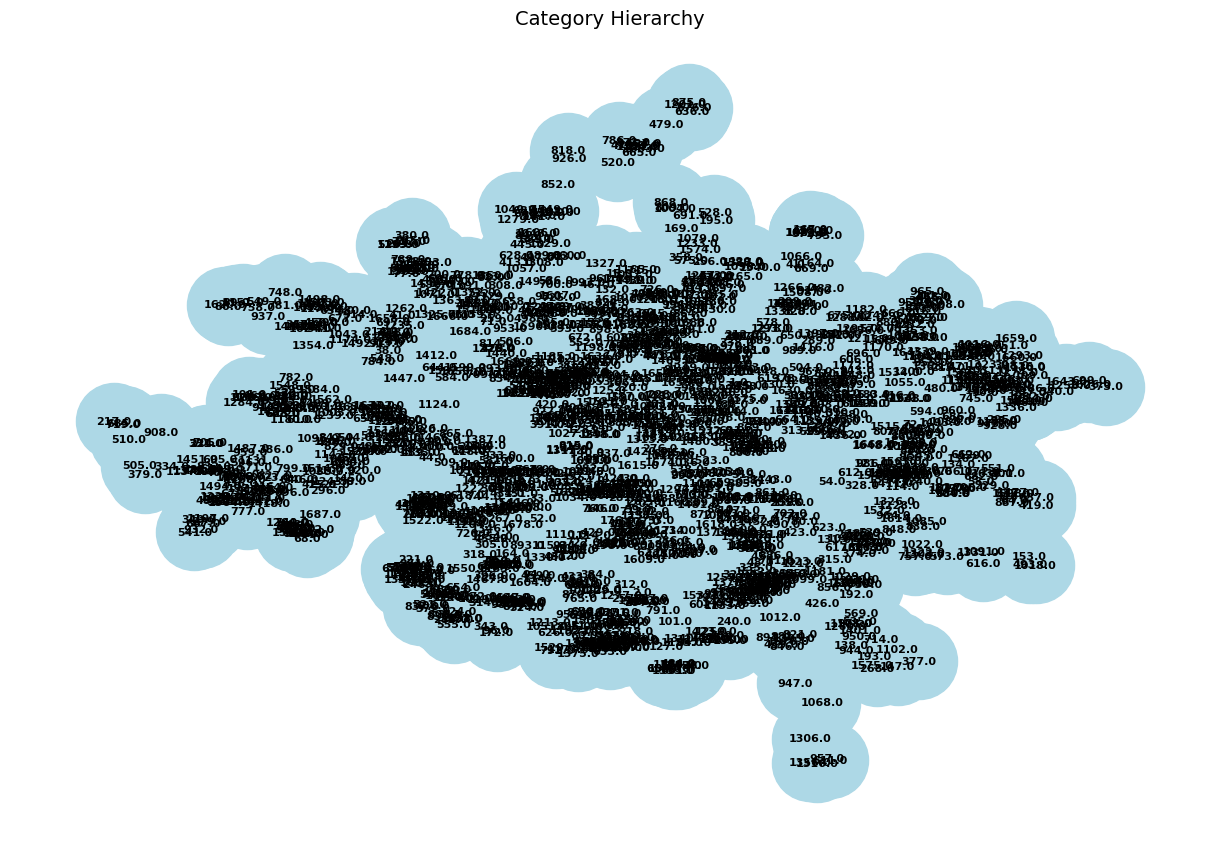

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Build graph from category_tree
G = nx.DiGraph()
for _, row in category_tree.iterrows():
    if pd.notna(row["parentid"]):
        G.add_edge(row["parentid"], row["categoryid"])

# Plot category hierarchy
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=8, font_weight="bold", arrows=True)
plt.title("Category Hierarchy", fontsize=14)
plt.show()

In [38]:
# Map items to categories
item_category_map = item_props[item_props["property"] == "categoryid"].set_index("itemid")["value"].to_dict()

def recommend_by_category(itemid, top_n=5):
    if itemid not in item_category_map:
        return f"Item {itemid} has no category."

    category = item_category_map[itemid]

    # Find items in same category
    same_category_items = [k for k, v in item_category_map.items() if v == category and k != itemid]

    return same_category_items[:top_n]

# Example
print("Category-based Recommendations for item 187946:", recommend_by_category(itemid=187946, top_n=5))

Category-based Recommendations for item 187946: [444663, 177065, 106968, 350580, 78682]


In [39]:
def hybrid_category(visitorid, itemid, alpha=0.6, top_n=5):
    hybrid_recs = hybrid_recommend(visitorid, itemid, alpha, top_n*3)

    # Restrict to same category as the target item
    if itemid in item_category_map:
        target_cat = item_category_map[itemid]
        hybrid_recs = [it for it in hybrid_recs if item_category_map.get(it) == target_cat]

    return hybrid_recs[:top_n]

# Example
print("Hybrid + Category Recommendations:", hybrid_category(visitorid=414122, itemid=187946, top_n=5))

Hybrid + Category Recommendations: [187946]
